<a href="https://colab.research.google.com/github/victorccard/Portfolio/blob/main/analiseAirbnb_RIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Rio de Janeiro
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<p>
<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"><center>


**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [ ]:
# Importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Carregar os dados na tabela 
df = pd.read_csv('listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias










In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,53344884,Suntuoso apartamento em Copacabana posto 6,431412286,Carlos Henrique,NaN,Copacabana,-22.98299,-43.18904,Entire home/apt,3500,3,0,NaN,NaN,10,365,0,NaN
1,44708736,Aluguel de Lancha no Rio de Janeiro,97164727,Jorge Quito,NaN,Glória,-22.91988,-43.17034,Entire home/apt,8999,1,2,2021-08-02,0.10,2,179,0,NaN
2,7801456,Ipanema Vieira Souto - Linda Vista,40650139,Carlos Alberto,NaN,Ipanema,-22.98723,-43.20452,Entire home/apt,5000,2,0,NaN,NaN,5,365,0,NaN
3,48227858,Ótimo apart-hotel com toda comodidade! ITAGUAÍ!!,387525952,Nelio,NaN,Santa Cruz,-22.87218,-43.76740,Entire home/apt,200,2,4,2021-12-17,0.22,2,356,1,NaN
4,36306164,Porto Real Resort cobertura espetacular,273041807,Andreia,NaN,Santa Cruz,-22.87738,-43.73780,Entire home/apt,636,2,12,2022-03-21,0.55,1,353,4,NaN


###**Q1. Quantos atributos(variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis**
Quantas entradas nosso conjunto de dados possui e quais os tipos de dados?

In [ ]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

Variáveis:	 26366
Entradas:	 18



In [ ]:
# Verificar os tipos de entradas do dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

###**Q2. Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível observar 3 situações importantes:
* A coluna `neighbourhood_group` e `license` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.  

In [ ]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.266366
last_review                       0.266366
name                              0.000721
host_name                         0.000190
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

###**Q3. Qual o tipo de distribuição das variáveis?**
Para identificar a distribuição das variáveis, irei plotar o histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8737e86f10>,
      dtype=object)

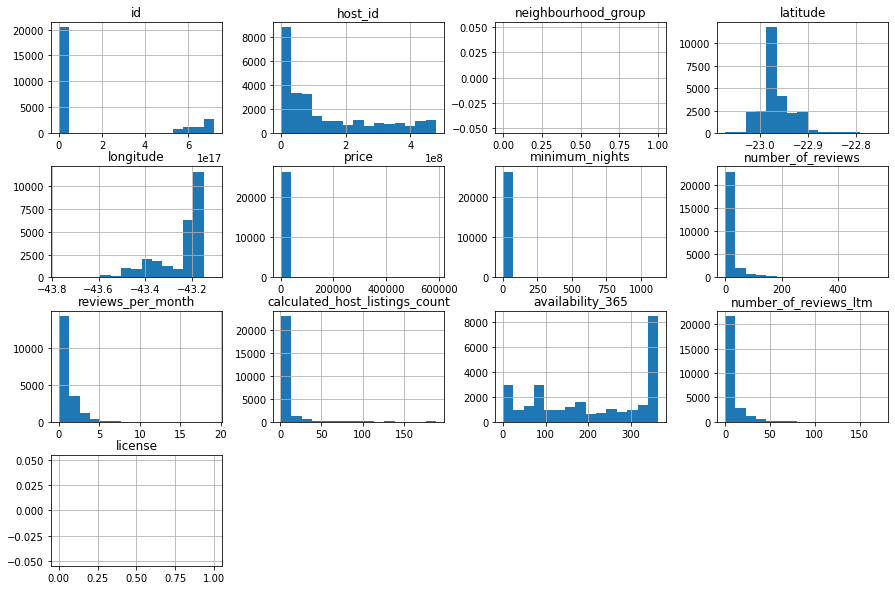

In [ ]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

###**Q4. Há outliers presentes?**
Pela forma que os dados estão distribuídos é possível verificar a presença de outliers. Como exemplo podemos pegar as colunas `calculated_host_listings_count`, `price` e `minimum_nights` 

Os valores não seguem uma distribuição padrão. Para confirmar podemos usar dois métodos de verificação da presença de outliers:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável

In [ ]:
# Ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26366.000000,26366.000000,26366.000000,19343.000000,26366.000000,26366.000000
mean,782.525791,5.068156,17.387507,0.964334,8.302966,211.595426
std,5265.469954,25.795705,37.456744,1.074740,23.093704,133.446650
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,183.000000,1.000000,0.000000,0.170000,1.000000,88.000000
50%,303.000000,2.000000,3.000000,0.620000,1.000000,216.000000
75%,600.000000,4.000000,16.000000,1.350000,4.000000,357.000000
max,590887.000000,1125.000000,549.000000,19.150000,189.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

- A variável `price` possui 75% do valor abaixo de 600, porém seu valor máximo é 590887.
- A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.


#### Boxplot para minimum_nights

In [ ]:
# Contagem de valores da variável minimum_nights
df['minimum_nights'].value_counts()

1      7013
2      7001
3      5519
4      1969
5      1862
       ... 
34        1
85        1
630       1
210       1
88        1
Name: minimum_nights, Length: 71, dtype: int64

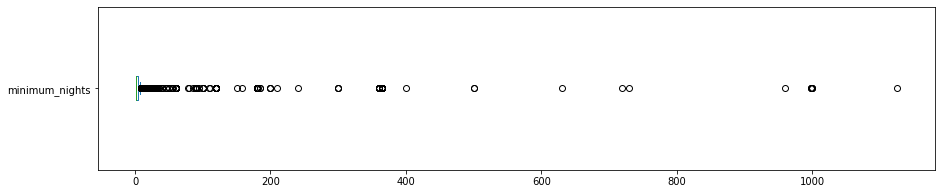

minimum_nights: valores acima de 30 dias
241 Entradas
0.9141%


In [ ]:
# Minimum_nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantitade de valores acima de 30 dias de minimum_nights
print("minimum_nights: valores acima de 30 dias")
print("{} Entradas".format(len(df[df['minimum_nights'] > 30])))
print("{:.4f}%".format((len(df[df['minimum_nights'] > 30]) / df.shape[0])*100))

#### Boxplot para price

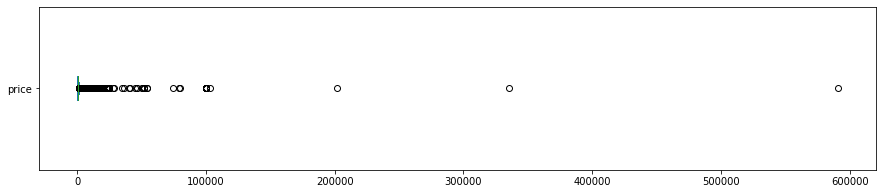

2022 entradas
7.6690%


In [ ]:
# Price
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de preços acima de R$1500
print("{} entradas".format(len(df[df['price'] > 1500])))
print("{:.4f}%".format((len(df[df['price'] > 1500]) / df.shape[0])*100))

###Boxplot para calculated_host_listings_count

1074 entradas
4.0734%


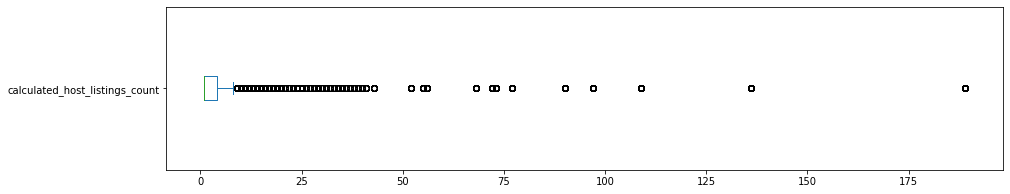

In [ ]:
# calculated_host_listings_count
df['calculated_host_listings_count'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de host com mais de 50 imóveis para alugar
print("{} entradas".format(len(df[df['calculated_host_listings_count'] > 50])))
print("{:.4f}%".format((len(df[df['calculated_host_listings_count'] > 50]) / df.shape[0])*100))

####Histogramas sem outliers
Já que identificamos outliers nas variáveis `calculated_host_listings_count`, `price` e `minimum_nights`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

*Fiz a limpeza dos bairros que possuem menos de 20 valores no dataset para facilitar na percepção de bairros mais caros.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effa1eadfd0>,
      dtype=object)

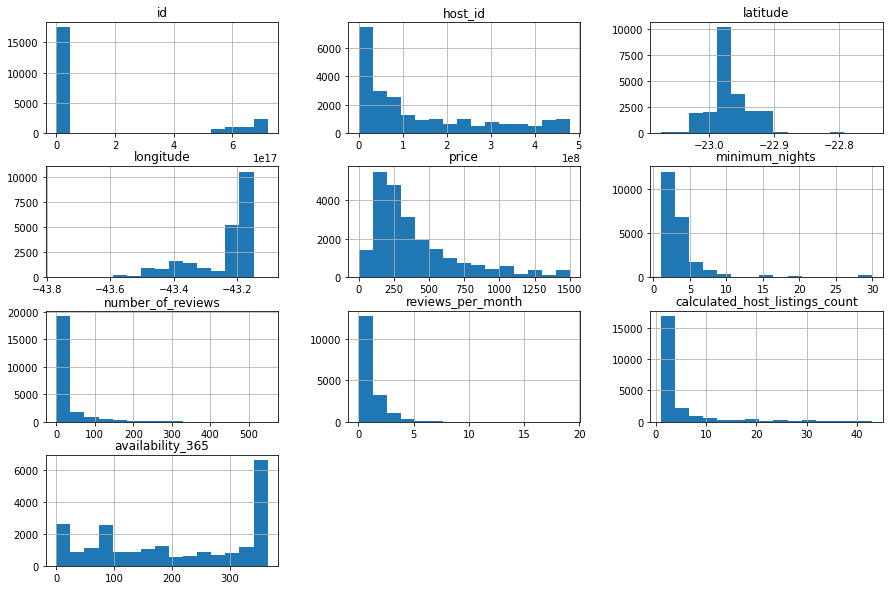

In [ ]:
# Remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 50].index, axis=0, inplace=True)
df_clean.drop(df_clean[(df_clean['neighbourhood'].value_counts().reindex(df_clean['neighbourhood']) < 20).values].index, axis=0, inplace=True)

#Remover a coluna neighbourhood_group, number_of_reviews_ltm e license.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('number_of_reviews_ltm', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

# Histograma sem outliers
df_clean.hist(bins=15, figsize=(15,10))

### **Q4.1 Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# Criar uma matriz de correlação
corr = df_clean[['price',	'minimum_nights',	'number_of_reviews',	
                 'reviews_per_month',	'calculated_host_listings_count',	
                 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.106654,-0.167325,-0.151967,0.022009,0.140142
minimum_nights,0.106654,1.000000,-0.072965,-0.178865,-0.017158,-0.017291
number_of_reviews,-0.167325,-0.072965,1.000000,0.407672,-0.004584,-0.133784
reviews_per_month,-0.151967,-0.178865,0.407672,1.000000,0.013461,-0.042682
calculated_host_listings_count,0.022009,-0.017158,-0.004584,0.013461,1.000000,-0.030530
availability_365,0.140142,-0.017291,-0.133784,-0.042682,-0.030530,1.000000


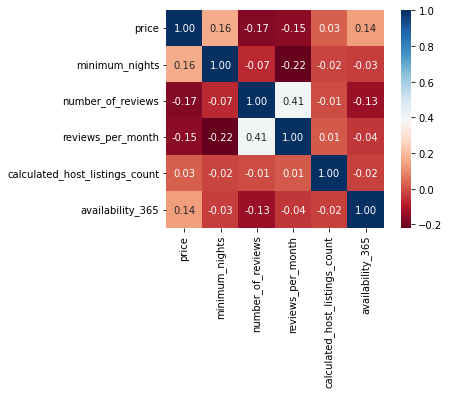

In [ ]:
# Mapa de calor
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [ ]:
# Mostra a quantidade de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    16613
Private room        5055
Shared room          431
Hotel room            52
Name: room_type, dtype: int64

In [ ]:
# Mostra a porcentagem dos imóveis disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]*100

Entire home/apt    74.998871
Private room       22.820640
Shared room         1.945736
Hotel room          0.234752
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# Filtrar os bairros por média de preço em ordem descrescente
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Joá                  573.511628
São Conrado          567.838462
Lagoa                562.036585
Leblon               535.209950
Barra da Tijuca      505.375562
Maracanã             493.592593
Engenho de Dentro    490.461538
Ipanema              487.681583
Jacarepaguá          477.469492
Gávea                462.798507
Name: price, dtype: float64

#**Q7. Qual é a média do mínimo de noites para alugar(minimum_nights)?**

In [ ]:
# Mostrar a média de minimo de noites 
df_clean['minimum_nights'].mean()

2.894702161307327

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

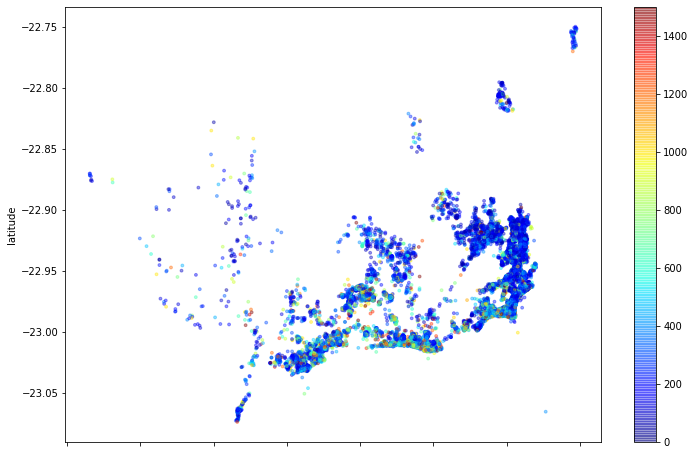

In [ ]:
# Plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.